In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('UKretail.csv', delimiter=',', encoding='ISO-8859-1')
data['total']=data['Quantity']*data['UnitPrice']
Nans = data[data.isnull().any(axis=1)]
data.dropna(how='any', inplace=True)
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['InvoiceDate'] = data['InvoiceDate'].dt.date
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

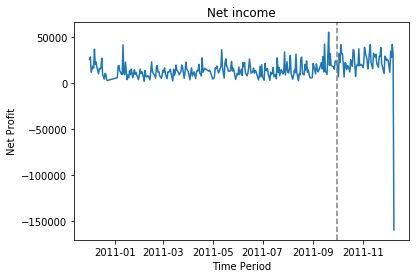

In [3]:
group_days = data.groupby('InvoiceDate')['total'].sum()
plt.figure()
plt.ylabel('Net Profit')
plt.xlabel('Time Period')
plt.plot(group_days.index, group_days)
plt.title('Net income')
plt.axvline(x=group_days.index[round(len(group_days)*0.8)], color='grey', linestyle='dashed')
plt.show()

In [4]:
bigreturn = data[data['InvoiceDate']=='2011-12-09']
bigreturn.loc[bigreturn['total'].idxmin()]

InvoiceNo                          C581484
StockCode                            23843
Description    PAPER CRAFT , LITTLE BIRDIE
Quantity                            -80995
InvoiceDate            2011-12-09 00:00:00
UnitPrice                             2.08
CustomerID                           16446
Country                     United Kingdom
total                              -168470
Name: 324262, dtype: object

In [5]:
cust16446 = data[data['CustomerID']==16446]
cust16446

InvoiceNo StockCode                  Description  Quantity InvoiceDate  \
116618    553573     22980       PANTRY SCRUBBING BRUSH         1  2011-05-18   
116619    553573     22982          PANTRY PASTRY BRUSH         1  2011-05-18   
324262   C581484     23843  PAPER CRAFT , LITTLE BIRDIE    -80995  2011-12-09   

        UnitPrice  CustomerID         Country      total  
116618       1.65     16446.0  United Kingdom       1.65  
116619       1.25     16446.0  United Kingdom       1.25  
324262       2.08     16446.0  United Kingdom -168469.60

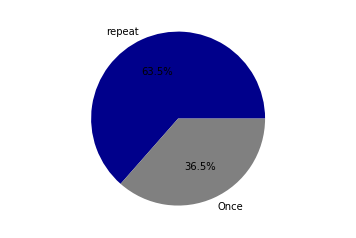

In [6]:
no_returns = data[data['InvoiceNo'].apply(lambda x: x[0]!='C')]
invoices = no_returns.groupby(['CustomerID', 'InvoiceDate' ,'InvoiceNo']).agg({'total':sum})
invoices.reset_index(inplace=True)
transactions = invoices.groupby('CustomerID').InvoiceDate.nunique()
repeat = len(transactions[transactions>=2])
non_repeat = len(transactions[transactions==1])
#Repeat and Once Customers
plt.figure()
plt.axis('equal')
plt.pie(x=[repeat,non_repeat], labels=['repeat', 'Once'], autopct='%1.1f%%', colors=['darkblue','grey'])
plt.show()

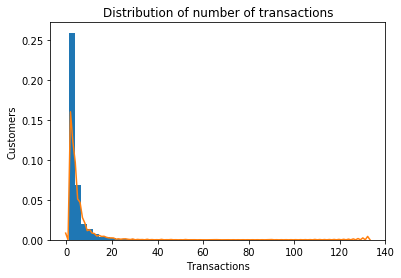

In [7]:
plt.figure()
plt.hist(transactions.values, bins=50, normed=True)
plt.title('Distribution of number of transactions')
plt.xlabel('Transactions')
plt.ylabel('Customers')
sns.kdeplot(transactions.values)
plt.show()

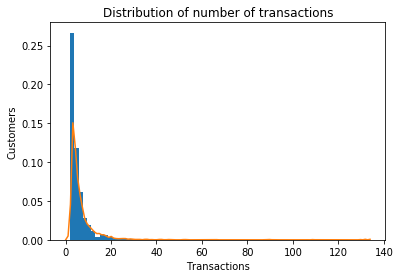

In [8]:
repeat_customers = transactions[transactions>1]
plt.figure()
plt.hist(repeat_customers.values, bins=70, normed=True)
plt.title('Distribution of number of transactions')
plt.xlabel('Transactions')
plt.ylabel('Customers')
sns.kdeplot(repeat_customers.values)
plt.show()

In [9]:
customer_lifetime = invoices.groupby('CustomerID').agg({'InvoiceDate':[min,max]})
customer_lifetime.columns = customer_lifetime.columns.droplevel(0)
customer_lifetime['lifetime'] = pd.to_datetime(customer_lifetime['max']).dt.date-pd.to_datetime(customer_lifetime['min']).dt.date
customer_lifetime['lifetime'] =customer_lifetime['lifetime'].dt.days
customer_lifetime

min        max  lifetime
CustomerID                                
12347.0    2010-12-07 2011-12-07       365
12348.0    2010-12-16 2011-09-25       283
12349.0    2011-11-21 2011-11-21         0
12350.0    2011-02-02 2011-02-02         0
12352.0    2011-02-16 2011-11-03       260
12353.0    2011-05-19 2011-05-19         0
12354.0    2011-04-21 2011-04-21         0
12355.0    2011-05-09 2011-05-09         0
12356.0    2011-01-18 2011-11-17       303
12357.0    2011-11-06 2011-11-06         0
12358.0    2011-07-12 2011-12-08       149
12359.0    2011-01-12 2011-10-13       274
12360.0    2011-05-23 2011-10-18       148
12361.0    2011-02-25 2011-02-25         0
12362.0    2011-02-17 2011-12-06       292
12363.0    2011-04-11 2011-08-22       133
12364.0    2011-08-19 2011-12-02       105
12365.0    2011-02-21 2011-02-21         0
12367.0    2011-12-05 2011-12-05         0
12370.0    2010-12-14 2011-10-19       309
12371.0    2011-10-11 2011-10-11         0
12372.0    2011-02-16 2011-09-29       225
12373.0    2011-02-01 2011-02-01         0
12374.0    2011-11-14 2011-11-14         0
12375.0    2011-09-02 2011-11-29        88
12377.0    2010-12-20 2011-01-28        39
12378.0    2011-08-02 2011-08-02         0
12379.0    2011-06-22 2011-09-19        89
12380.0    2011-06-07 2011-11-18       164
12381.0    2011-08-12 2011-12-05       115
...               ...        ...       ...
18242.0    2011-05-10 2011-09-28       141
18245.0    2010-12-19 2011-12-02       348
18246.0    2011-04-20 2011-11-16       210
18248.0    2011-06-06 2011-08-09        64
18249.0    2011-11-22 2011-11-22         0
18250.0    2011-02-02 2011-02-02         0
18251.0    2011-09-13 2011-09-13         0
18252.0    2011-06-21 2011-10-20       121
18255.0    2011-09-11 2011-09-11         0
18257.0    2011-02-16 2011-10-31       257
18259.0    2010-12-08 2011-11-15       342
18260.0    2010-12-16 2011-06-20       186
18261.0    2011-09-05 2011-10-27        52
18262.0    2011-07-22 2011-07-22         0
18263.0    2011-04-01 2011-11-14       227
18265.0    2011-07-04 2011-09-28        86
18268.0    2011-07-28 2011-07-28         0
18269.0    2010-12-08 2010-12-08         0
18270.0    2011-03-18 2011-11-01       228
18272.0    2011-04-07 2011-12-07       244
18273.0    2011-09-05 2011-12-07        93
18274.0    2011-11-09 2011-11-09         0
18276.0    2011-10-27 2011-10-27         0
18277.0    2011-10-12 2011-10-12         0
18278.0    2011-09-27 2011-09-27         0
18280.0    2011-03-07 2011-03-07         0
18281.0    2011-06-12 2011-06-12         0
18282.0    2011-08-05 2011-12-02       119
18283.0    2011-01-06 2011-12-06       334
18287.0    2011-05-22 2011-10-12       143

[4291 rows x 3 columns]

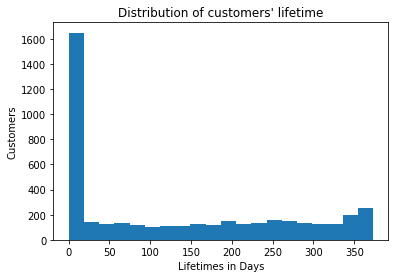

In [10]:
plt.figure()
plt.title('Distribution of customers\' lifetime')
plt.xlabel('Lifetimes in Days')
plt.ylabel('Customers')
plt.hist(customer_lifetime['lifetime'].values, bins=20)
plt.show()